In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [7]:
dataset=pd.read_csv("Geneva Ionomics_Z_Spec_as_int.csv")

In [8]:
dataset= dataset.iloc[:, 1:]

In [9]:
genotype = pd.get_dummies(dataset, drop_first = True)

In [10]:
dataset.isnull().values.any()

False

In [11]:
dataset.isnull().sum().sum()

0

In [12]:
new_dataset = pd.concat([genotype, dataset], axis = 1)

In [13]:
X= new_dataset.iloc[:, :].values

In [14]:
sc= StandardScaler()
X= sc.fit_transform(X)


In [15]:
wss=[]
for i in range (1,11):
    kmeanscluster = KMeans(n_clusters = i, init = 'k-means++')
    kmeanscluster.fit(X)
    kmeanscluster.inertia_
    wss.append(kmeanscluster.inertia_)
    

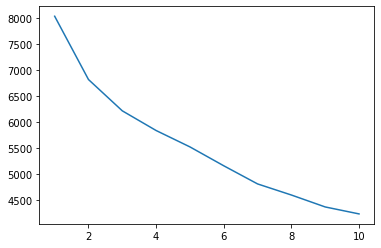

In [17]:
plt.plot(range(1,11), wss)

In [18]:
kmeanscluster = KMeans(n_clusters= 5, init = 'k-means++')
kmeanscluster.fit(X)
Y_pred = kmeanscluster.predict(X)

In [2]:
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric = 'euclidean'))
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dataset, 'ward')
h =hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=dataset.index)
plt.savefig("dendogram Z")


NameError: name 'sch' is not defined

In [20]:
cluster= AgglomerativeClustering(n_clusters  = 5)

In [21]:
cluster.fit(X)
Y_pred_dendrogram = cluster.fit_predict(X)